In [1]:
### questa lezione tratta di un'applicazione con un classificatore SVM (Support Vector Machine)
### tratta dalla nuova edizione del libro di Raschka ("Machine Learning con Python") cap.3;
### l'applicazione utilizza le coordinate geografiche dei comuni italiani per mappare il territorio
### nazionale nelle 20 regioni (input=coordinate geografiche, output=codice_regione)
### from scikit-learn import datasets
### Lezione32a è una copia di Lezione32 per provare diversi tipi di classificatore (la visualizzazione del contorno
### delle regioni è disattivata per mettere in evidenza i dati del test)
### Lezione32b è una copia di Lezione32a da usare su Laptop-09 per lanciare contemporaneamente più simulazioni e per
### evidenziare le "zone decisionali" attribuite dal classificatore a ciascuna regione

In [2]:
### questa funzione è tratta dal libro con qualche piccola modifica (aggiunta di markers e colori per 
### indicare 20 categorie al posto di 5)
def plot_decision_regions(X, y, classifier, test_idx = None):

    # setup marker generator and color map
    import numpy as np
    markers = ('.', ',', 'o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', '.', ',', 'o', 'v', '^', '<')
    colors = ('White','Black','Red','Green','Blue','Yellow','Cyan','Magenta','Orange','Purple','Pink','Lime','Brown',
              'LightGray','Gray','LightBlue','Gold','Silver','Tan','Lavender','Turquoise','Coral')
    m = len(np.unique(y))
    cmap = ListedColormap(colors)
    
    # modifica della dimensione
    plt.figure(figsize=(20.0,20.0))
    
    # plot the decision surface 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1.
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1.
    scaling = 400. ### parametro critico per la velocità (usare 100. per prove veloci)
    resolution = min(x1_max - x1_min, x2_max - x2_min) / scaling 
    print("building the meshgrid")
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    print("mesh points prediction")
    grid = np.array([xx1.ravel(), xx2.ravel()])
    Z = classifier.predict(grid.T)
    
    ### cerca di azzerare i punti dei bordi
    e = len(grid.ravel()) / 2
    c = 0
    for a in grid.T:
        d = 0
        for b in X:
            dx = a[0] - b[0]
            dy = a[1] - b[1]
            if dx * dx + dy * dy < .005:
                d = 1
                break
        if d == 0: Z[c] = 21
        c += 1
        if c % 100 == 0: print (f"\rpoint number = {c} total = {int(e)} percentage = {int(100. * c / e)}%", 
                                end = "            ", flush = True)
    
    ### disegna le regioni decisionali
    print("\nplotting the contour")   
    Z = Z.reshape(xx1.shape)
    Z = np.where(Z == 2, 22, Z) ## per visualizzare la Val D'Aosta cambio il valore da 2 a 22
    plt.contourf(xx1, xx2, Z, m, alpha=1.0, cmap=cmap)
    
    '''
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=1.0, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black'
                    )

    # highlight test examples
    '''
    '''
    ### plot test points
    if test_idx:
        print("plotting the test points")
        X_test, y_test = X[test_idx, :], y[test_idx]
        Z = classifier.predict(np.array([X_test[:, 0], X_test[:, 1]]).T)
        colors = list(colors)
        k = len(colors)
        clr = [colors[i%k] for i in Z]
        plt.scatter(X_test[:, 0], X_test[:, 1], c = clr, edgecolor = 'black', alpha = 1.0, linewidth = 1, marker= '.',
                    s = 100, label = 'test set')
    '''
    # complete the drawing of the figure
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.xlabel('LONGITUDE')
    plt.ylabel('LATITUDE')
    #plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('c:\\documenti\\demografia\\machine learning\\regioni neurali_b.png', dpi=300)
    #plt.figure(figsize=(20.0,20.0))
    #plt.tight_layout()
    plt.show()

scaler fitted
SVM fitted
building the meshgrid
mesh points prediction
point number = 164400 total = 164400 percentage = 100%            
plotting the contour


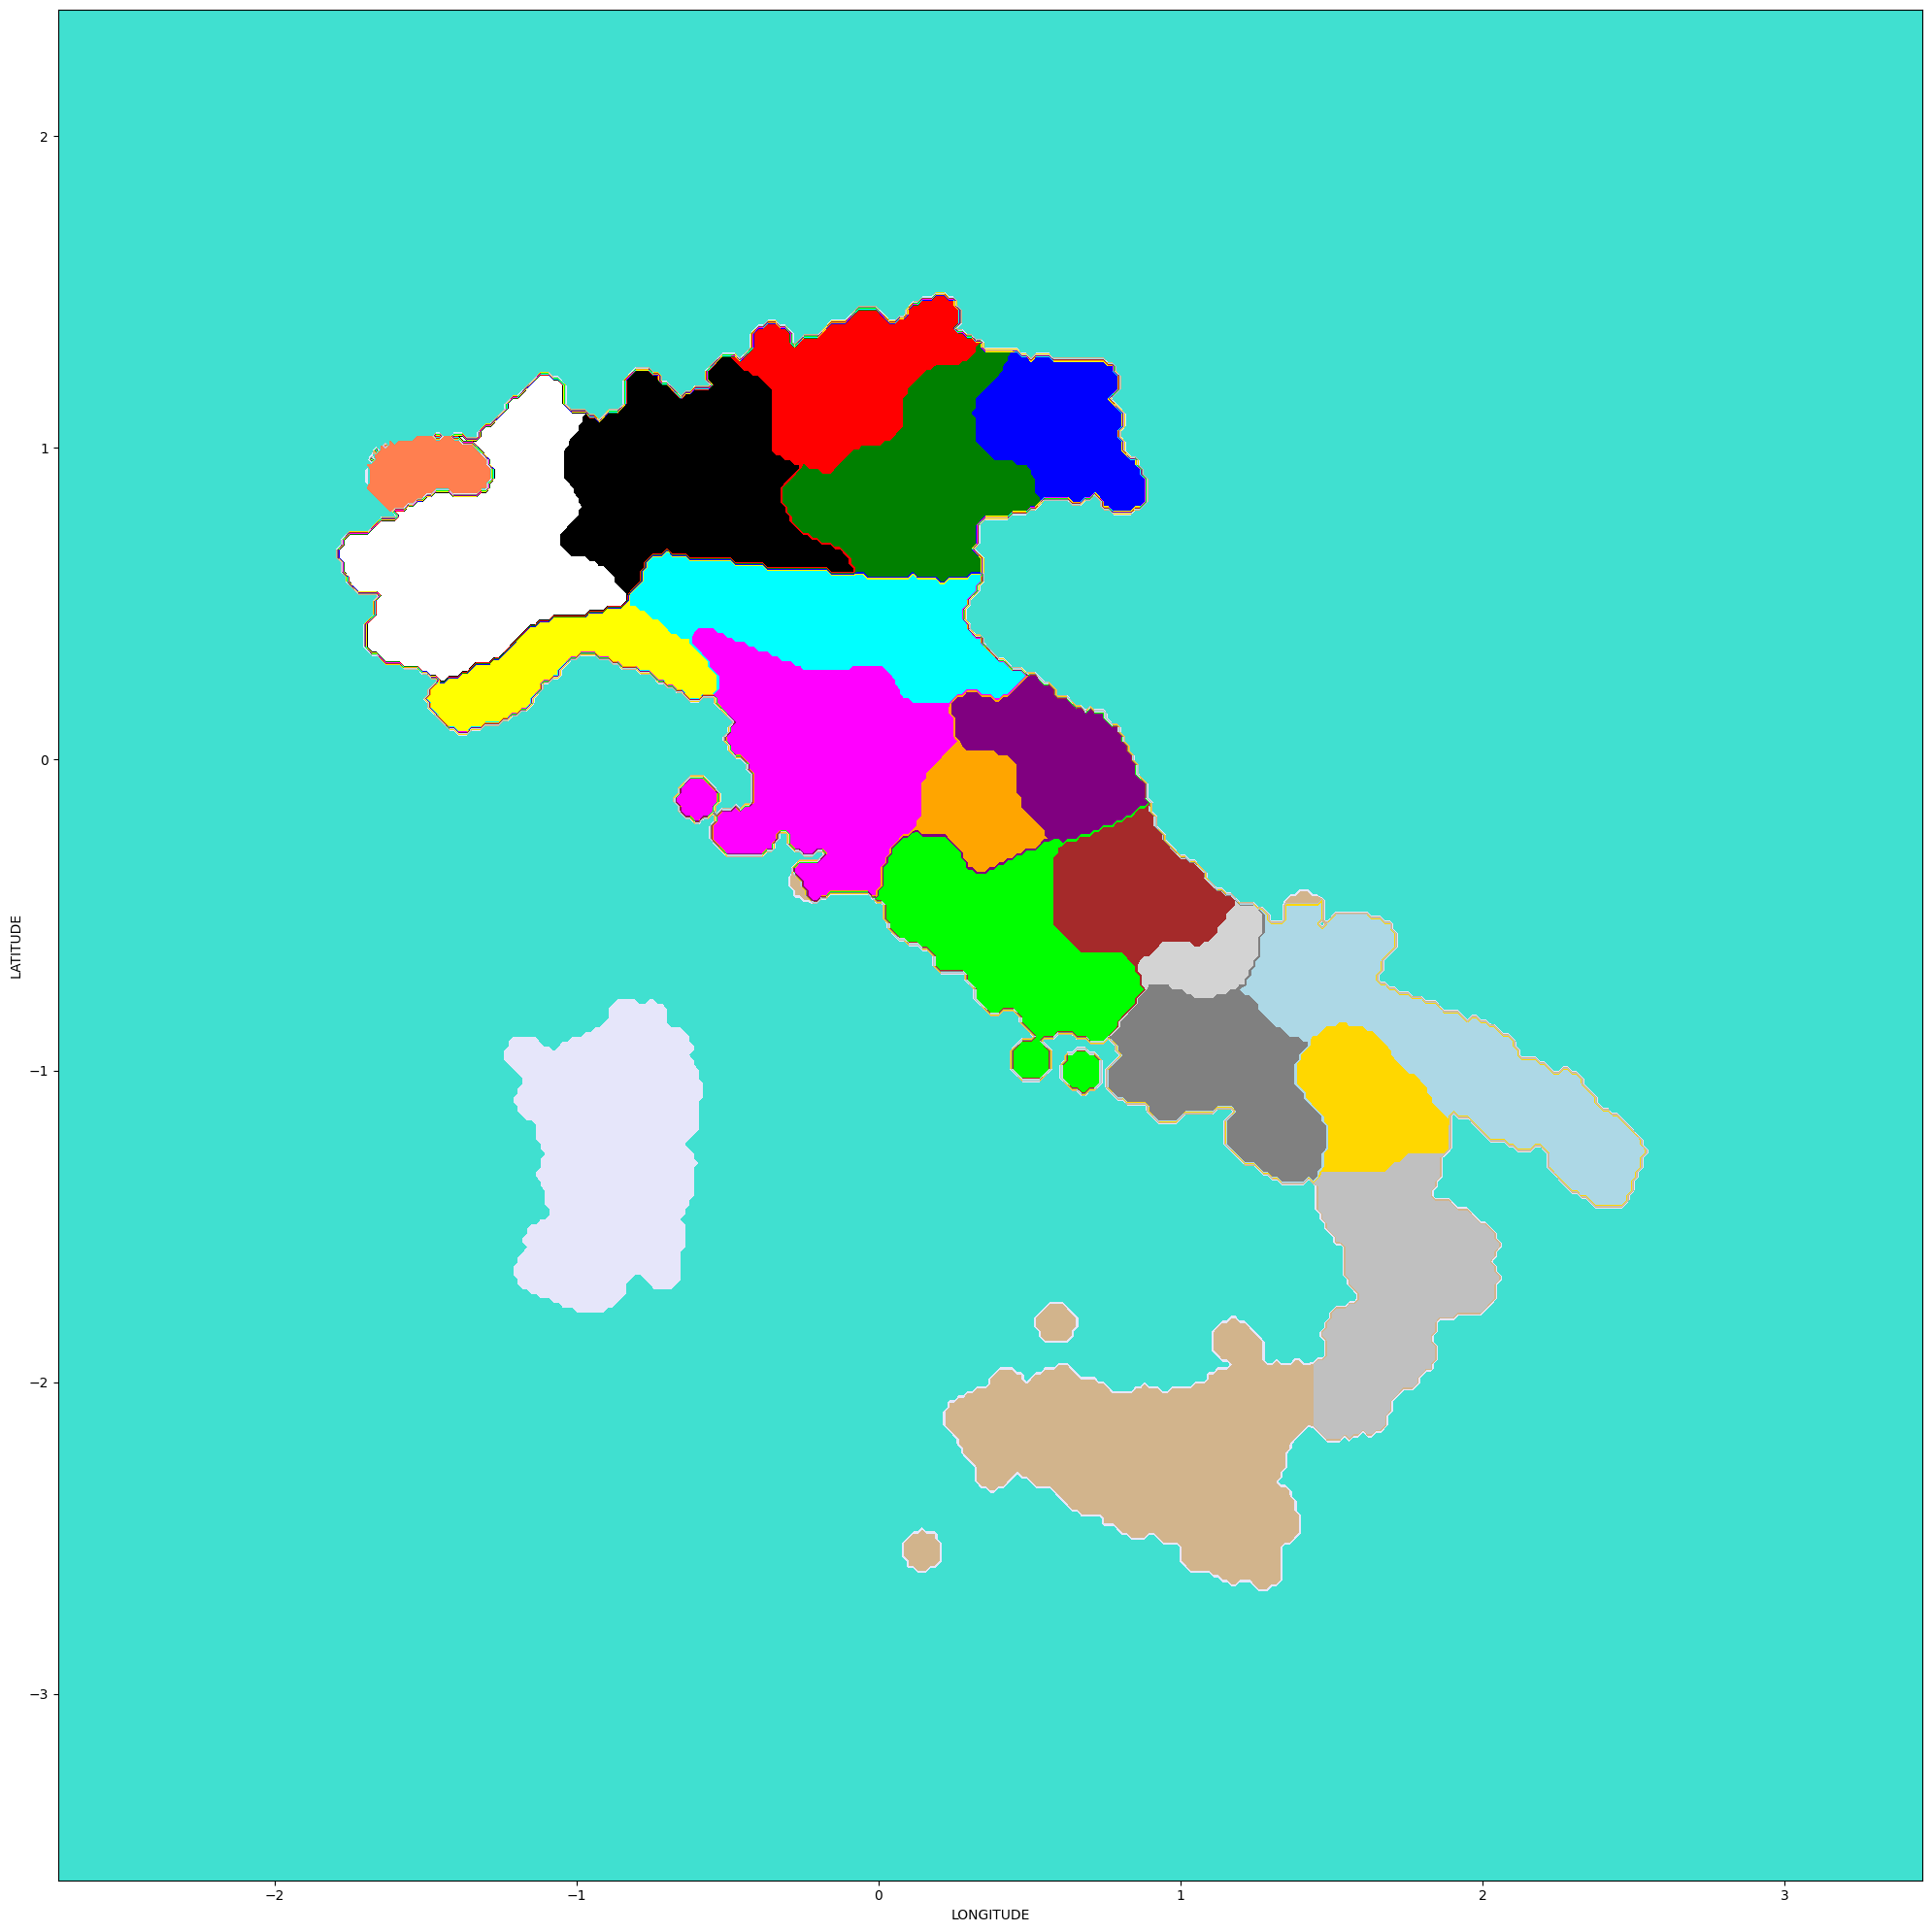

CPU times: total: 10min 49s
Wall time: 10min 58s


In [3]:
%%time
### questo script stampa il grafico della classificazione delle aree geografiche in regioni
### la classificazione è ancora parziale (da approfondire)
import time
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
##filename = "c:\\documenti\\demografia\\download\\python\\comuni6.csv"
filename = "comuni6.csv"
df = pd.read_csv(filename, header = None)
numcomuni = df.shape[0]
x = df.iloc[:numcomuni].values
x = x.transpose()
X = []
y = []
for i in range(len(x[0])):
    X.append([x[7][i],x[6][i]])
    y.append(int(x[0][i]))

##from sklearn import datasets
from sklearn.model_selection import train_test_split
##iris = datasets.load_iris()
### più veloce con meno dati di training (ex: test_size=0.5 è più veloce di test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
print("scaler fitted")
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

from sklearn.svm import SVC ## durata fino a 20 minuti su laptop-08 con scaling = 1000. (vedi funzione "plot_decision_regions")
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 100.0, C = 1.0) ### alti valori di gamma aumentano il tempo di calcolo
svm.fit(X_train_std, y_train)
print("SVM fitted")
plot_decision_regions(X_combined_std, y_combined, classifier = svm, test_idx = range(6000, 7890)) 

##from sklearn.neighbors import RadiusNeighborsClassifier ## attenzione: occupa molta memoria
##rnc = RadiusNeighborsClassifier(radius = 3.0, weights = 'uniform', algorithm = 'auto', 
##                                leaf_size = 30, p = 2, metric = 'minkowski', outlier_label = None, 
##                                metric_params = None, n_jobs = None)
##rnc.fit(X_train_std, y_train)
##print("RNC fitted")
##plot_decision_regions(X_combined_std, y_combined, classifier=rnc, test_idx=range(4000, 7890))

##from sklearn.neighbors import NearestCentroid
##nc = NearestCentroid(metric = 'euclidean', shrink_threshold = None, priors = 'uniform')
##nc.fit(X_train_std, y_train)
##print("NC fitted")
##plot_decision_regions(X_combined_std, y_combined, classifier=nc, test_idx=range(4000, 7890))

##from sklearn.ensemble import RandomForestClassifier ## durata attorno ai 3 minuti su laptop-08 (parallelizabile)
##rfc = RandomForestClassifier(n_estimators = 1000, criterion = 'gini', max_depth = 200, n_jobs = 16)
##rfc.fit(X_train_std, y_train)
##print("RFC fitted")
##plot_decision_regions(X_combined_std, y_combined, classifier=rfc, test_idx=range(4000, 7890))

